In [ ]:
import requests
import pandas as pd
from pandas import json_normalize
import datetime
import matplotlib.pyplot as plt
import numpy as np

# URL of the Uniswap v3 subgraph
url = 'https://api.thegraph.com/subgraphs/name/uniswap/uniswap-v3'

# Function to fetch data with pagination
def fetch_data_with_pagination(query_template, pool_id):
    all_data = []
    last_id = ""
    while True:
        query = query_template % (pool_id, last_id)
        response = requests.post(url, json={'query': query})
        data = response.json()

        if 'errors' in data:
            print("GraphQL query error:", data['errors'])
            break

        new_data = data['data']['swaps'] if 'swaps' in data['data'] else []
        new_data.extend(data['data']['mints'] if 'mints' in data['data'] else [])
        new_data.extend(data['data']['burns'] if 'burns' in data['data'] else [])

        if not new_data:
            break

        all_data.extend(new_data)
        last_id = new_data[-1]['id']

    return all_data

# Define query templates
swap_query_template = """
{
  swaps(first: 1000, where: { pool: "%s", id_gt: "%s" }) {
    id
    timestamp
    sender
    recipient
    amount0
    amount1
    amountUSD
    pool {
      id
      token0 {
        id
        symbol
        name
      }
      token1 {
        id
        symbol
        name
      }
    }
    transaction {
      id
      blockNumber
      gasUsed
      gasPrice
    }
  }
}
"""

mint_query_template = """
{
  mints(first: 1000, where: { pool: "%s", id_gt: "%s" }) {
    id
    timestamp
    sender
    amount0
    amount1
    amountUSD
  }
}
"""

burn_query_template = """
{
  burns(first: 1000, where: { pool: "%s", id_gt: "%s" }) {
    id
    timestamp
    owner
    origin
    amount0
    amount1
    amountUSD
  }
}
"""

In [ ]:
# Example usage
pool_id = "0x7bea39867e4169dbe237d55c8242a8f2fcdcc387"

swaps_data = fetch_data_with_pagination(swap_query_template, pool_id)
mints_data = fetch_data_with_pagination(mint_query_template, pool_id)
burns_data = fetch_data_with_pagination(burn_query_template, pool_id)

# Convert the results to pandas DataFrames for easier analysis
swaps_df =  json_normalize(swaps_data)
mints_df = pd.DataFrame(mints_data)
burns_df = pd.DataFrame(burns_data)

swaps_df['time'] = swaps_df['timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(int(x)))


In [ ]:
swaps_df.to_csv('pool_id_0x7bea39867e4169dbe237d55c8242a8f2fcdcc387',index=False)

In [ ]:
# Example usage
pool_id = "0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640"

swaps_data = fetch_data_with_pagination(swap_query_template, pool_id)
mints_data = fetch_data_with_pagination(mint_query_template, pool_id)
burns_data = fetch_data_with_pagination(burn_query_template, pool_id)

# Convert the results to pandas DataFrames for easier analysis
swaps_df =  json_normalize(swaps_data)
mints_df = pd.DataFrame(mints_data)
burns_df = pd.DataFrame(burns_data)

swaps_df['time'] = swaps_df['timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(int(x)))


In [ ]:
pool_id = "0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8"

swaps_data = fetch_data_with_pagination(swap_query_template, pool_id)
mints_data = fetch_data_with_pagination(mint_query_template, pool_id)
burns_data = fetch_data_with_pagination(burn_query_template, pool_id)

# Convert the results to pandas DataFrames for easier analysis
swaps_df =  json_normalize(swaps_data)
#mints_df = pd.DataFrame(mints_data)
#burns_df = pd.DataFrame(burns_data)

swaps_df['time'] = swaps_df['timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(int(x)))

records = 35000

for count,chunk in enumerate(range(0,len(swaps_df)+records, records)):
    swaps_df.iloc[chunk:chunk+35000].to_csv(f'pool_id_{pool_id}_{count}.csv')
    print(chunk)

In [ ]:

Sure! Here is the complete code with the variable name changed from user_aggregates to df1:

python
Copy code
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame df with columns user_id, transaction_volume, and transaction_value
# Example of loading the data (replace with your actual data loading mechanism)
# df = pd.read_csv('your_data_file.csv')

# For demonstration, let's create a sample DataFrame
# df = pd.DataFrame({
#     'user_id': ['user1', 'user2', 'user3', 'user4', 'user1', 'user2'],
#     'transaction_volume': [100, 200, 300, 400, 500, 600],
#     'transaction_value': [1000, 2000, 3000, 4000, 5000, 6000]
# })

# Aggregate volume and value by user
df1 = swaps_df.groupby('sender').agg(
    total_volume=pd.NamedAgg(column='amount0_abs', aggfunc='sum'),
    total_value=pd.NamedAgg(column='amountUSD', aggfunc='sum')
).reset_index()

# Calculate the total volume and value for all users
total_volume = df1['total_volume'].sum()
total_value = df1['total_value'].sum()

# Calculate the percentage of total volume and value for each user
df1['volume_percent'] = df1['total_volume'] / total_volume * 100
df1['value_percent'] = df1['total_value'] / total_value * 100

# Sort by volume percentage and calculate cumulative percentage
df1 = df1.sort_values(by='volume_percent', ascending=False).reset_index(drop=True)
df1['cumulative_volume_percent'] = df1['volume_percent'].cumsum()

# Sort by value percentage and calculate cumulative percentage
df1 = df1.sort_values(by='value_percent', ascending=False).reset_index(drop=True)
df1['cumulative_value_percent'] = df1['value_percent'].cumsum()


In [ ]:
swaps_df[(swaps_df['time']<datetime.datetime(2022,1,23))*(swaps_df['time']>datetime.datetime(2022,1,21))].to_excel('time_validation.xlsx')
swaps_df['amount0_abs'] = swaps_df['amount0'].apply(lambda x:abs(float(x)))
swaps_df['amountUSD'] = swaps_df['amountUSD'].apply(lambda x:abs(float(x)))

swaps_df1 = swaps_df.merge(test[['sender','Bracket']],on='sender',how='left')

In [ ]:
swaps_df2 = swaps_df1[~swaps_df1['Bracket'].isin(['6) 200 - 499 Transactions','7) 500 - 999 Transactions','8) 1000 - 1999 Transactions','9) 2000+ Transactions'])]


/Users/derekdewald/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/derekdewald/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/derekdewald/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/derekdewald/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

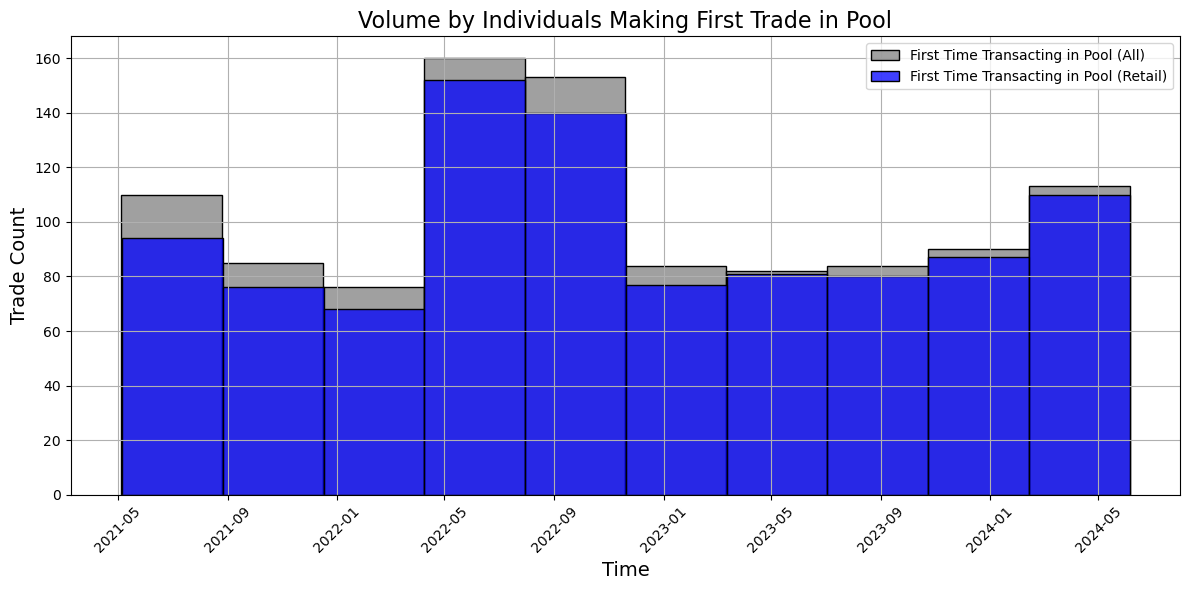

,Bracket,Total Trades,Total Traders,Perc_Vol
0,1) One Transaction,272,272,0.000495
1,2) 1 - 9 Transactions,1493,357,0.002719
2,3) 9 - 49 Transactions,5496,232,0.010010
3,4) 50 - 99 Transactions,3370,51,0.006138
4,5) 100 - 199 Transactions,7599,53,0.013840
5,6) 200 - 499 Transactions,7963,25,0.014503
6,7) 500 - 999 Transactions,9852,15,0.017944
7,8) 1000 - 1999 Transactions,7213,5,0.013137
8,9) 2000+ Transactions,505789,27,0.921213


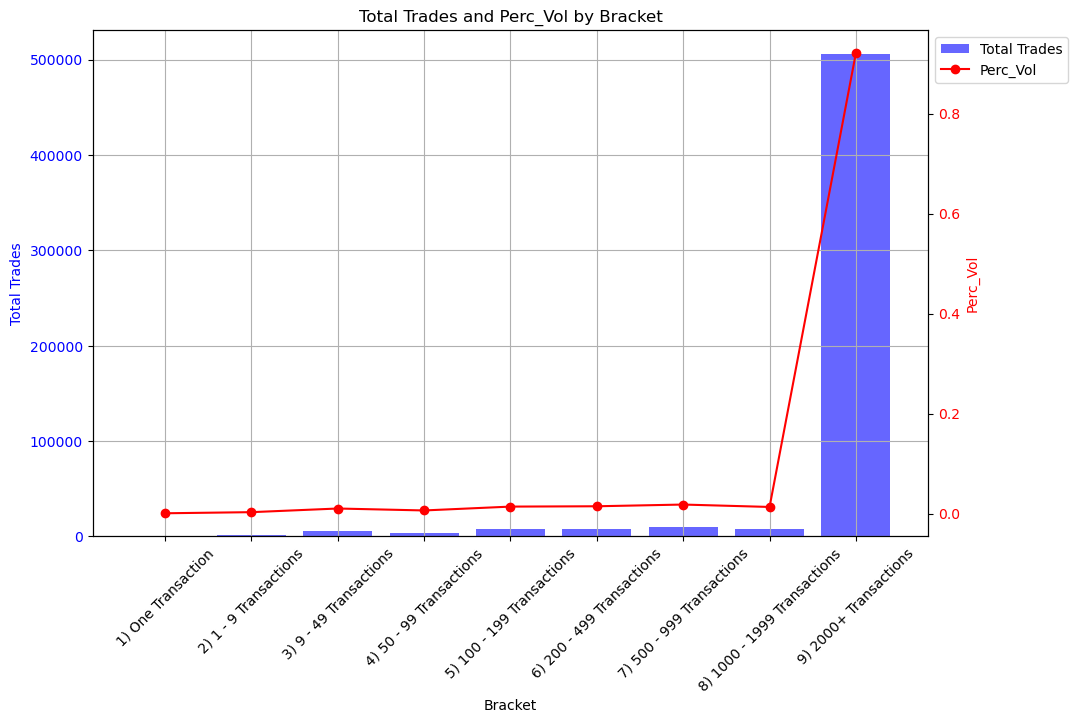

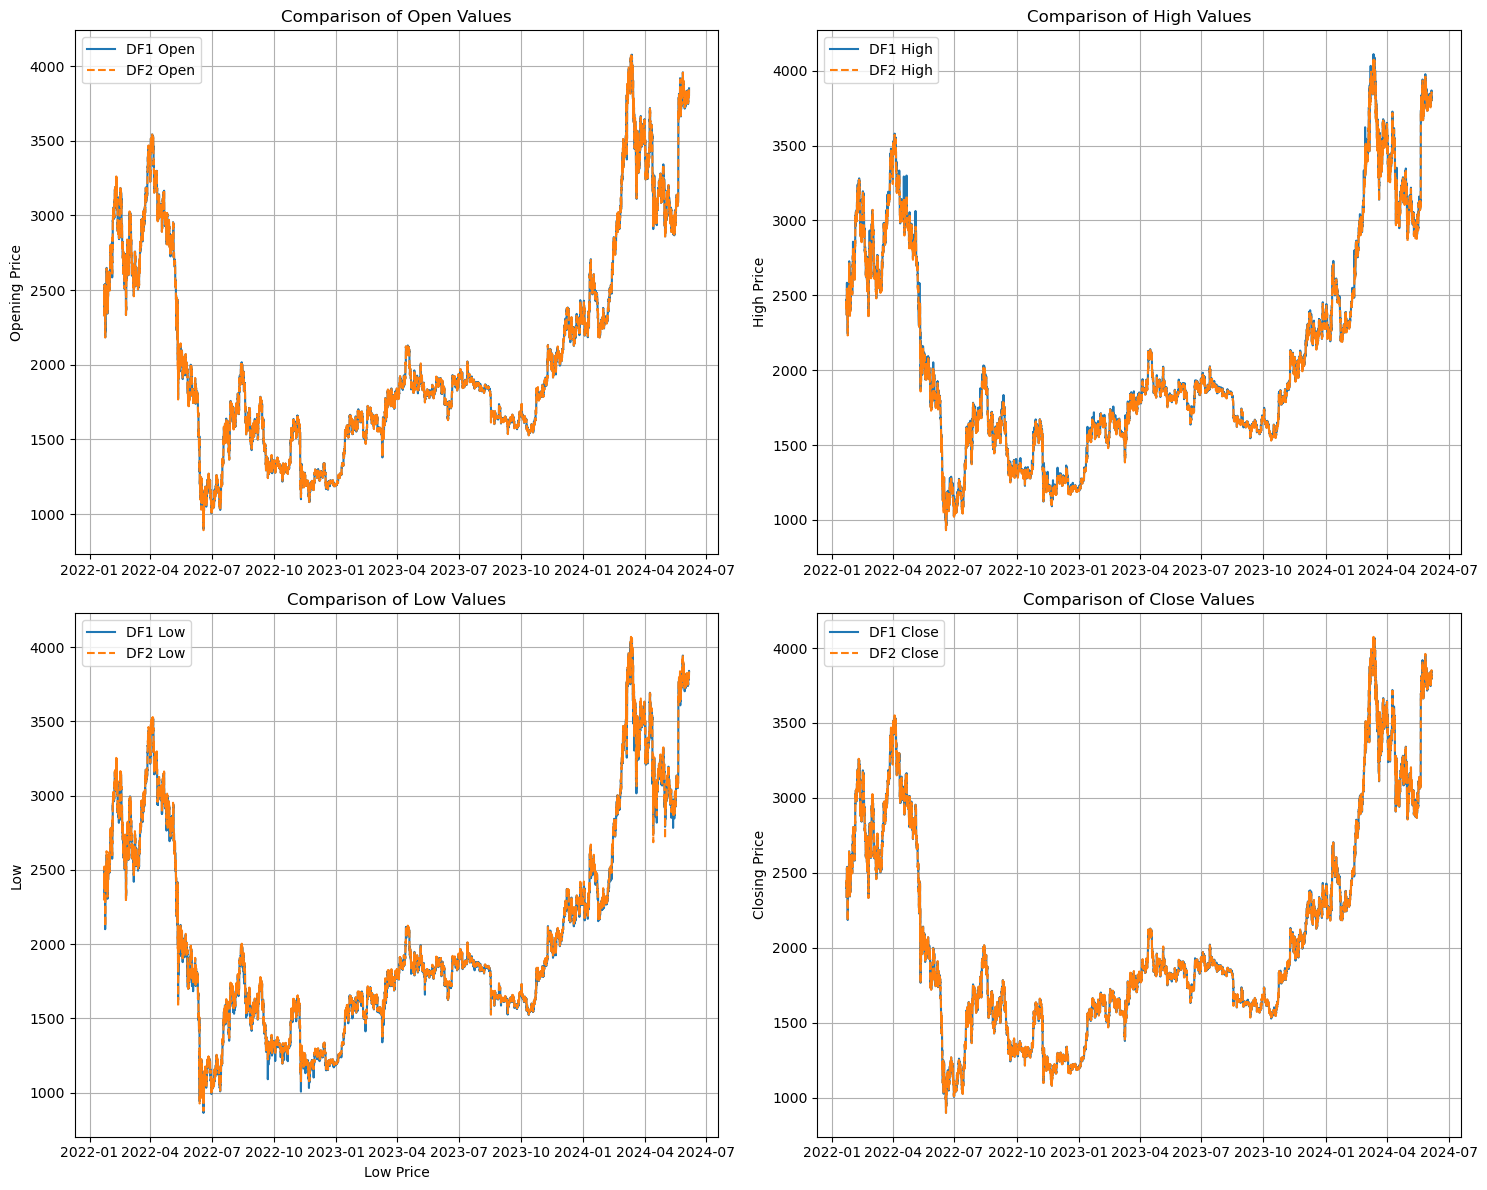

In [ ]:
color=diff_line_color, linestyle=diff_line_style, linewidth=diff_line_width

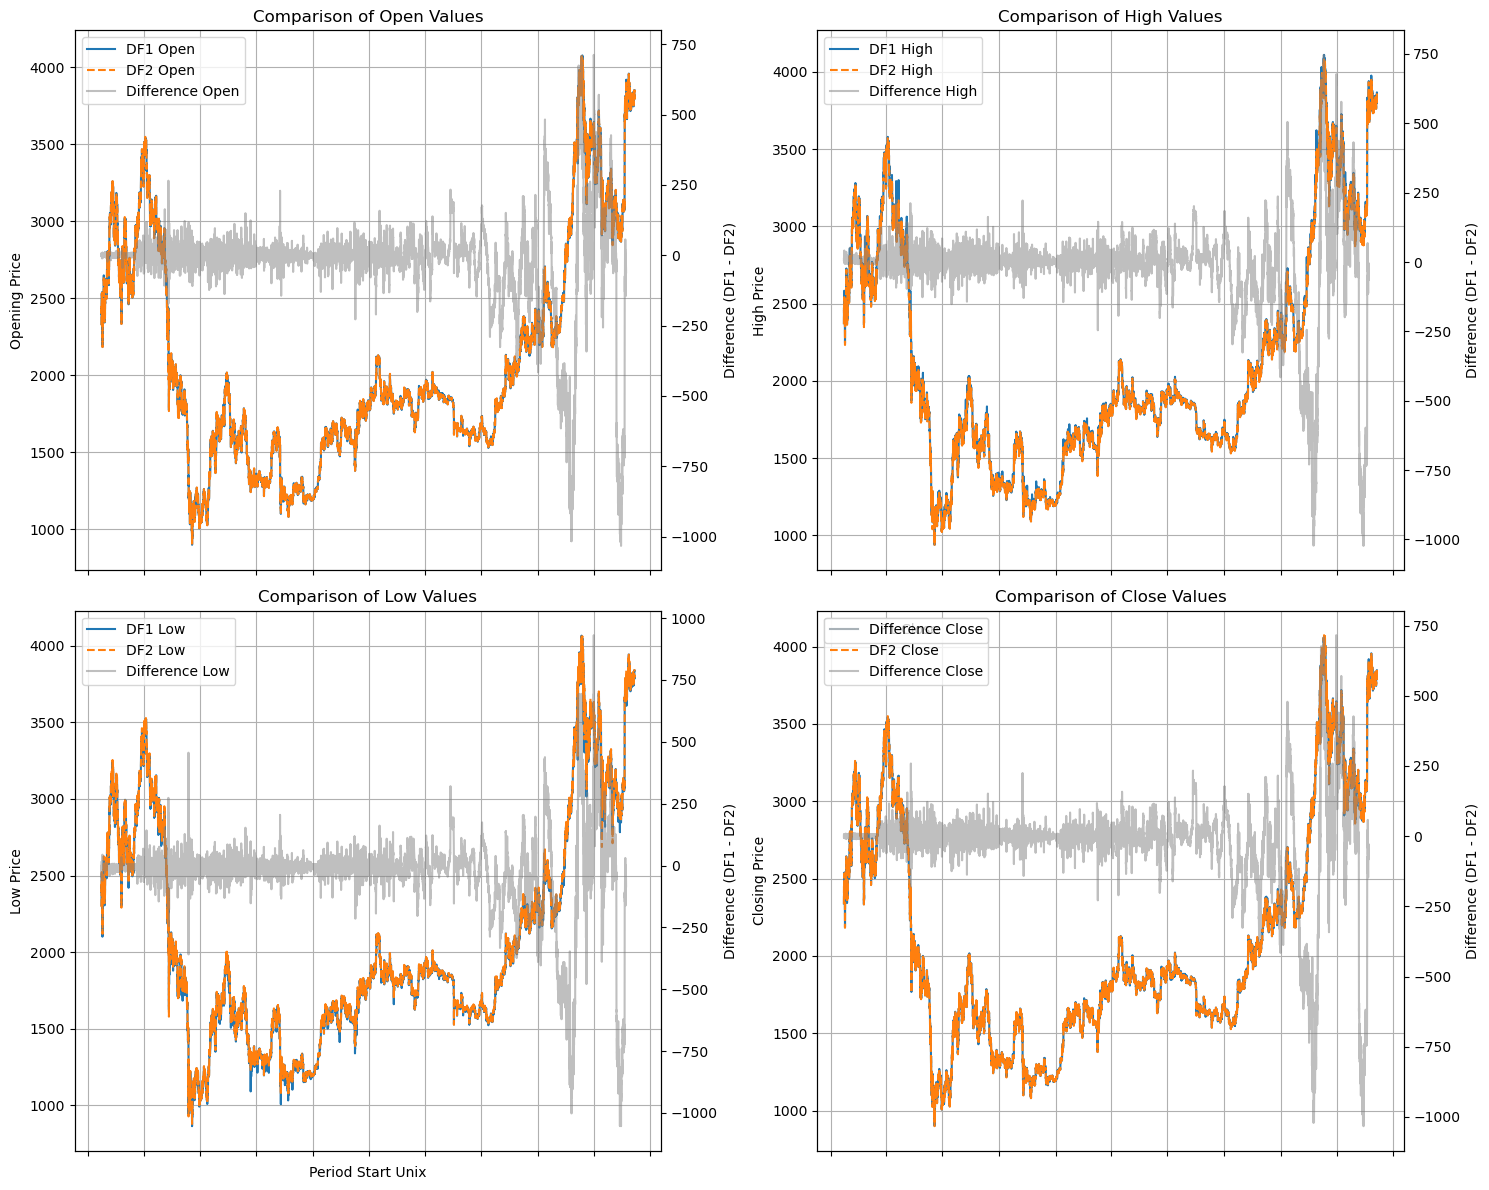

In [ ]:


fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot comparison of 'txCount'
axs[0].plot(df1['liquidity'], df1['txCount'], label='DF1 txCount')
axs[0].plot(df2['liquidity'], df2['txCount'], label='DF2 txCount', linestyle='--')
axs[0].set_xlabel('Liquidity')
axs[0].set_ylabel('txCount')
axs[0].set_title('Comparison of Transaction Counts')
axs[0].legend()
axs[0].grid(True)

# Plot comparison of 'liquidity'
axs[1].plot(df1['liquidity'], df1['liquidity'], label='DF1 Liquidity')
axs[1].plot(df2['liquidity'], df2['liquidity'], label='DF2 Liquidity', linestyle='--')
axs[1].set_xlabel('Liquidity')
axs[1].set_ylabel('Liquidity')
axs[1].set_title('Comparison of Liquidity')
axs[1].legend()
axs[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
activity_df2.iloc[0]

periodStartUnix      2022-01-22 11:00:00
liquidity          6239066375204162560.0
open                         2333.475267
high                         2366.559991
low                          2294.327467
close                        2336.438678
token0Price                  2336.438678
token1Price                     0.000428
txCount                             74.0
Name: 0, dtype: object

In [ ]:
activity_df1 = pd.read_excel('hourly_0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640.xlsx')


In [ ]:
swaps_df.columns

Index(['id', 'timestamp', 'sender', 'recipient', 'amount0', 'amount1',
       'amountUSD', 'pool.id', 'pool.token0.id', 'pool.token0.symbol',
       'pool.token0.name', 'pool.token1.id', 'pool.token1.symbol',
       'pool.token1.name', 'transaction.id', 'transaction.blockNumber',
       'transaction.gasUsed', 'transaction.gasPrice', 'time', 'amount0_abs'],
      dtype='object')

In [ ]:
pd.DataFrame(swaps_df['sender'].value_counts())

,count
sender,
0xe592427a0aece92de3edee1f18e0157c05861564,170454
0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,95099
0x3fc91a3afd70395cd496c647d5a6cc9d4b2b7fad,35797
0xa69babef1ca67a37ffaf7a485dfff3382056e78c,31810
0xef1c6e67703c7bd7107eed8303fbe6ec2554bf6b,28497
...,...
0x6db01031355fbf8eea0c06a5d56217ba1967f0df,1
0x5b140256a890360a1d0fffd476c56d654ea0c7fa,1
0x7740b04a1d9026cde29dde498429109c1af9114e,1


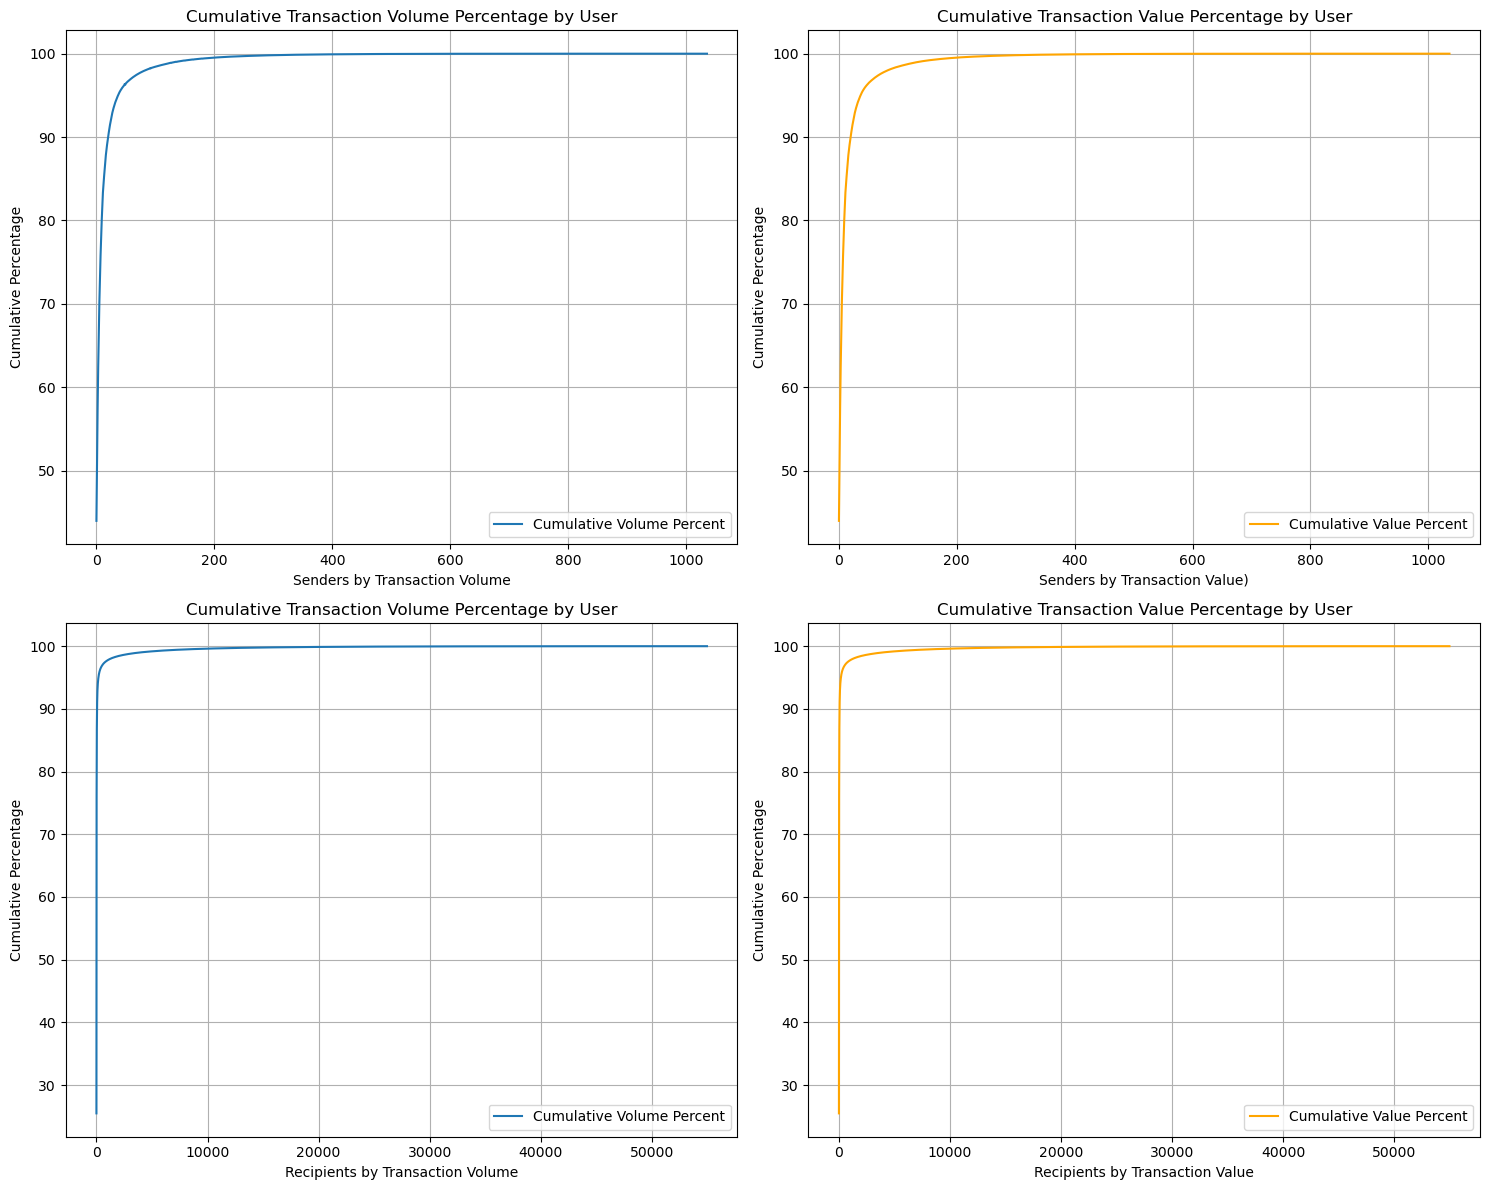

In [ ]:
# Create a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Plot cumulative volume percentage in (0,0)
axs[0, 0].plot(df1.index, df1['cumulative_volume_percent'], label='Cumulative Volume Percent')
axs[0, 0].set_xlabel('Senders by Transaction Volume')
axs[0, 0].set_ylabel('Cumulative Percentage')
axs[0, 0].set_title('Cumulative Transaction Volume Percentage by User')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Plot cumulative value percentage in (0,1)
axs[0, 1].plot(df1.index, df1['cumulative_value_percent'], label='Cumulative Value Percent', color='orange')
axs[0, 1].set_xlabel('Senders by Transaction Value)')
axs[0, 1].set_ylabel('Cumulative Percentage')
axs[0, 1].set_title('Cumulative Transaction Value Percentage by User')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Plot cumulative volume percentage in (0,0)
axs[1, 0].plot(df2.index, df2['cumulative_volume_percent'], label='Cumulative Volume Percent')
axs[1, 0].set_xlabel('Recipients by Transaction Volume')
axs[1, 0].set_ylabel('Cumulative Percentage')
axs[1, 0].set_title('Cumulative Transaction Volume Percentage by User')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Plot cumulative value percentage in (0,1)
axs[1, 1].plot(df2.index, df2['cumulative_value_percent'], label='Cumulative Value Percent', color='orange')
axs[1, 1].set_xlabel('Recipients by Transaction Value')
axs[1, 1].set_ylabel('Cumulative Percentage')
axs[1, 1].set_title('Cumulative Transaction Value Percentage by User')
axs[1, 1].legend()
axs[1, 1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()
